In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mean_01 = np.array([3.0,4.0])
mean_02 = np.array([0.0, -1.0])

cov_01 = np.array([[1.0,0.0],[0.0,1.0]])
cov_02 = np.array([[0.75,0.4],[0.4,0.6]])

In [5]:
dist_01 = np.random.multivariate_normal(mean_01,cov_01,200)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,200)

In [6]:
print dist_01.shape
print dist_02.shape

(200, 2)
(200, 2)


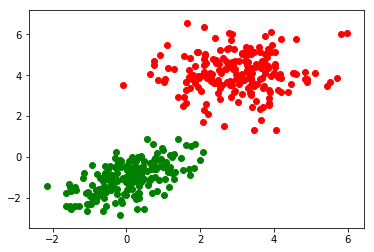

In [7]:
plt.figure(0)
for ix in range(dist_01.shape[0]):
    plt.scatter(dist_01[ix,0],dist_01[ix,1], color='red')
    plt.scatter(dist_02[ix,0], dist_02[ix,1], color='green')
    
plt.show()

0.5


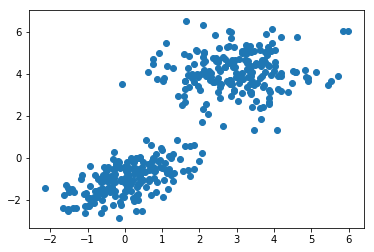

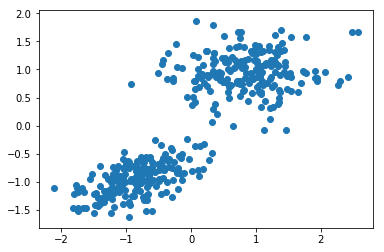

In [9]:
labels = np.zeros((400,))
labels[200:] = 1.0
print labels.mean()

X_data = np.zeros((400, 2))
X_data[:200, :] = dist_01
X_data[200:, :] = dist_02

plt.figure(0)
plt.scatter(X_data[:, 0], X_data[:, 1])

X_std = (X_data - X_data.mean(axis=0))/X_data.std(axis=0)

plt.figure(1)
plt.scatter(X_std[:, 0], X_std[:, 1])

plt.show()

In [10]:
def dist(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())
    # return abs(x1-x2).sum()
    # return np.sqrt(0.5*((np.sqrt(x1) - np.sqrt(x2))**2).sum())

print dist(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

1.41421356237


In [11]:
def knn(X_train, x, y_train, k=5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        v = [dist(x, X_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x: x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr[:, 1], return_counts=True)
    pred = pred_arr[1].argmax()
    # return pred_arr[0][pred]
    return pred_arr

q = np.array([0.10, 0.0])

res = knn(X_std, q, labels, k=7)
print res

(array([ 0.,  1.]), array([3, 4]))
